# 07. SVC methods

In [2]:
import os
import sklearn
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from IPython.display import display

In [3]:
data = './data/'
out = './out/'

# Bold print for Jupyter Notebook
b1 = '\033[1m'
b0 = '\033[0m'

### Just some matplotlib and seaborn parameter tuning

In [4]:
axistitlesize = 20
axisticksize = 17
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')

## 1.) Linear SVC in case of linear separation

- load the Iris dataset (can be found in sklearn API)
- scale the data and plot the petal length vs petal width in a scatterplot colored with the target
- train an SVC model with linear kernel with default parameter settings, but once with C=1 and then C=1000
- visualize the model's decision boundary and the margins based on the coefficients learnt by the model
- interpret the results, what is the role of the C hyperparameter?

In [18]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [88]:
def scale_data(X):
    """
    Normalize the data to have zero mean and unit variance.
    
    Parameters:
    -----------
    X : ndarray or array-like in shape of (N, M)
        The unscaled dataset.
    
    Returns:
    --------
    X : ndarray in shape of (N, M)
        The already scaled dataset with zero mean and unit variance.
    """
    # Initialize
    scaler = StandardScaler()
    # Compute the mean and standard dev. and scale the dataset `X`
    X = scaler.fit_transform(X)

    return X

### 1./a. Load the Iris dataset and discover feature values

In [89]:
# Load iris values and labels
iris = load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
# Scale dataset
X = pd.DataFrame(scale_data(X), columns=features)

### I'm just testing, which plots are easier to read...
#### Default colors

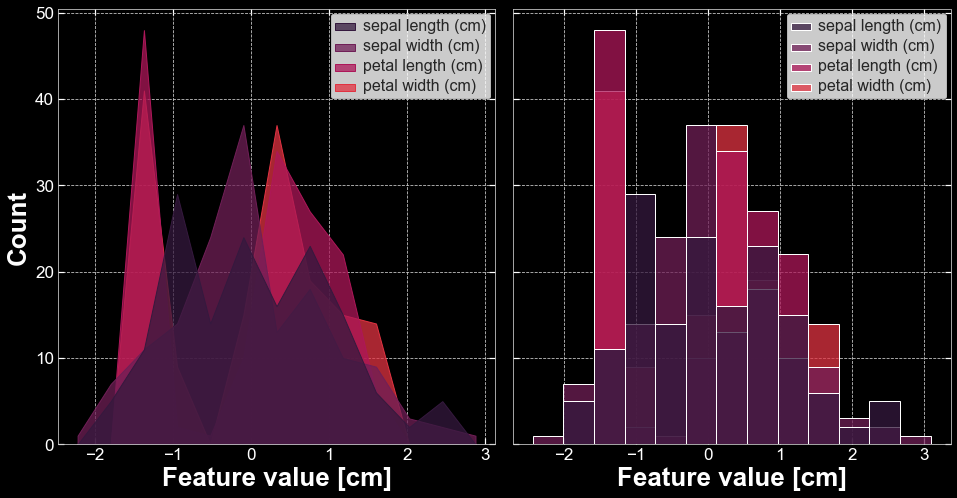

In [160]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*8,nrows*8),
                         sharey=True,
                         facecolor='black', subplot_kw={'facecolor' : 'black'})
fig.subplots_adjust(hspace=0.09, wspace=0.04)

# Visualization style of figure
methods = ['poly', 'bars']
for i, ax in enumerate(axes):
    sns.histplot(X, stat='count', element=methods[i], cumulative=False, common_bins=True,
                 ax=ax)
    ax.set_xlabel('Feature value [cm]', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.set_ylabel('Count', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

    plt.setp(ax.get_legend().get_texts(), fontsize=16) # for legend text

plt.show()

### Custom palette

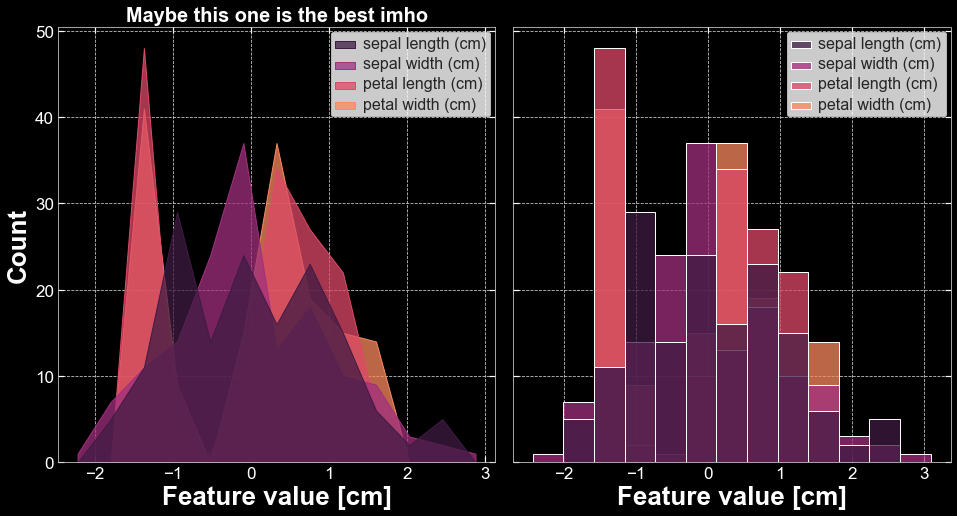

In [161]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*8,nrows*8),
                         sharey=True,
                         facecolor='black', subplot_kw={'facecolor' : 'black'})
fig.subplots_adjust(hspace=0.09, wspace=0.04)

# Colors...
rocket_cmap = sns.color_palette('rocket', as_cmap=True)
palette = [rocket_cmap(0.17), cm.magma(0.45), cm.magma(0.60), cm.magma(0.75)]
# Visualization style of figure
methods = ['poly', 'bars']
for i, ax in enumerate(axes):
    sns.histplot(X, stat='count', element=methods[i], cumulative=False, common_bins=True,
                 palette=palette,
                 ax=ax)
    ax.set_xlabel('Feature value [cm]', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.set_ylabel('Count', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

    plt.setp(ax.get_legend().get_texts(), fontsize=16) # for legend text

axes[0].set_title('Maybe this one is the best imho', fontsize=axistitlesize, fontweight='bold', color='white')
    
plt.show()

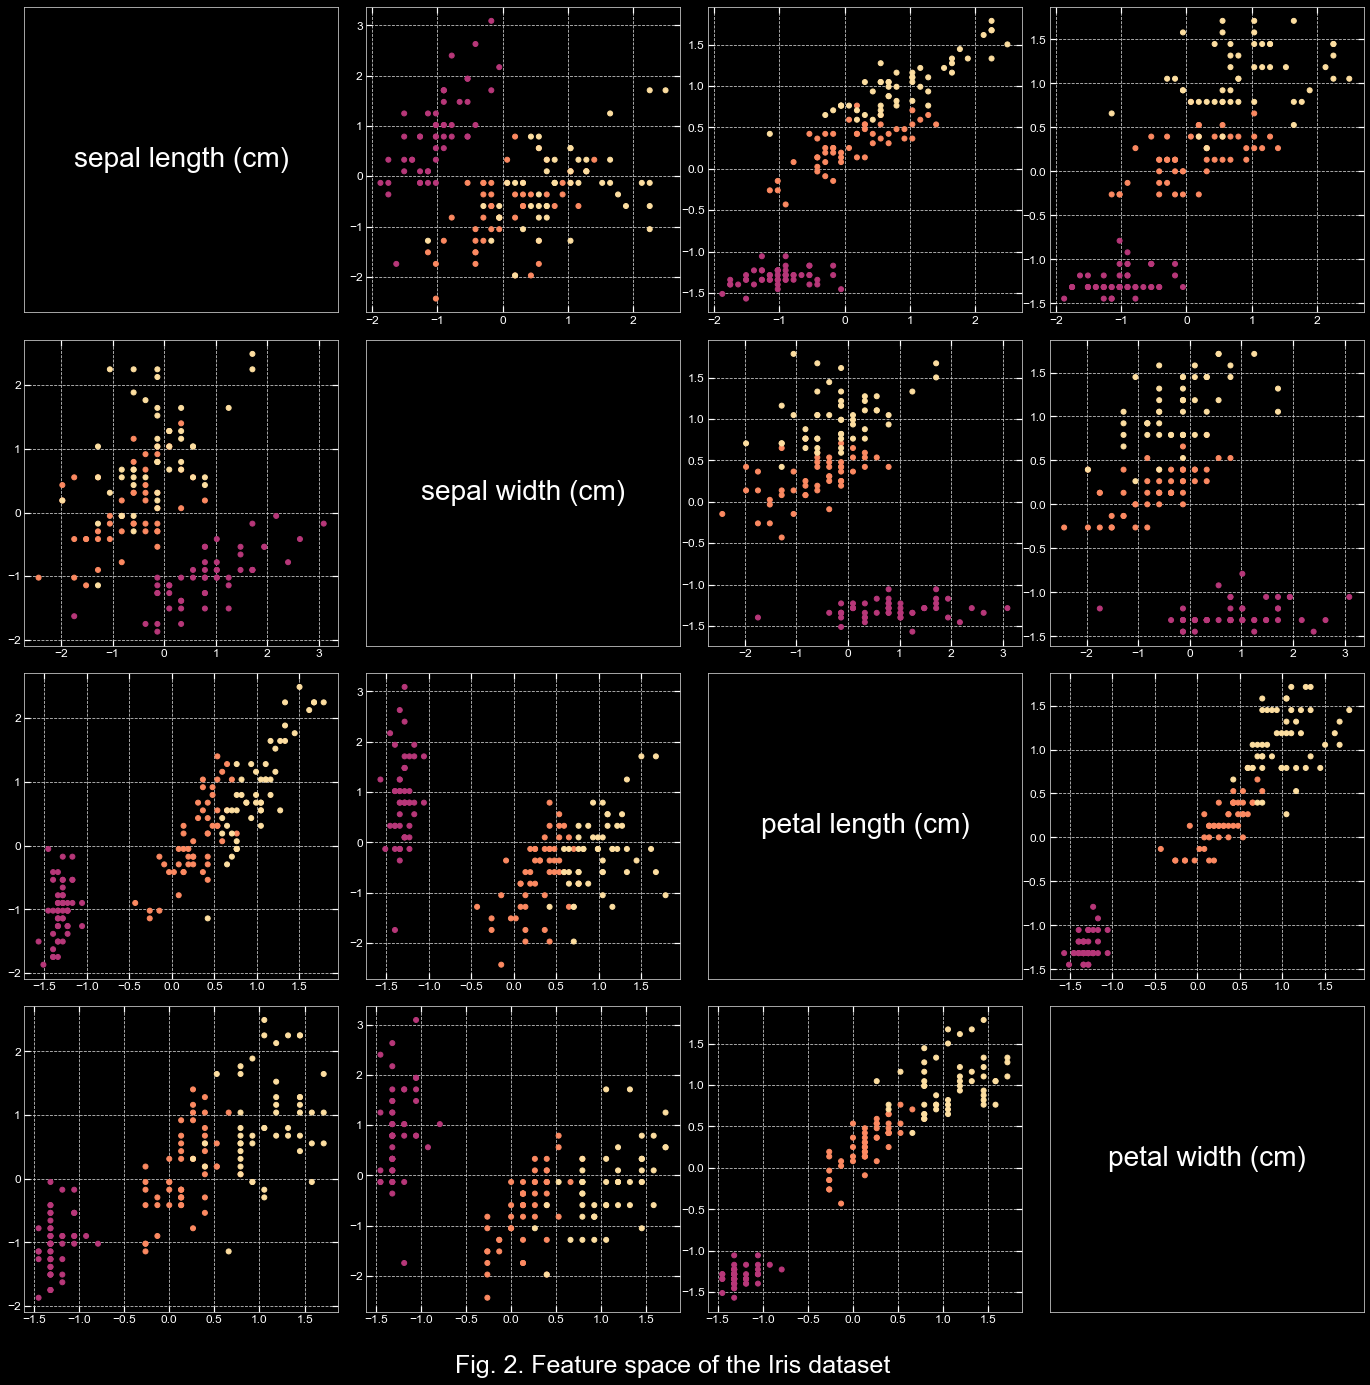

In [199]:
# Visualize iris dataset
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*6, nrows*6),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})
fig.subplots_adjust(hspace=0.09, wspace=0.09)

sc = 5
target_colors = np.array([cm.magma(0.5), cm.magma(0.75), cm.magma(0.93)])
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if i==j:
            ax.text(0.5, 0.5, features[i], color='white',
                    fontsize=28, ha='center', va='center')
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.scatter(X[features[i]], X[features[j]], s=sc**2,
                       color=target_colors[y])
            ax.tick_params(axis='both', which='major', labelsize=12, colors='white')

plt.suptitle('Fig. 2. Feature space of the Iris dataset', color='white',
             fontsize=axistitlesize+5, y=0.1)
plt.show()

### 1./b. Fit the default SVC model from `sklearn`

In [185]:
from sklearn.metrics import confusion_matrix

In [186]:
def accuracy_metric(y_test, y_pred):
    """
    Calculate accuracy of model prediction.
    
    Parameters:
    -----------
    y_test : array-like of shape (N, )
        Original labels of the test dataset.
    
    y_pred : array-like of shape (N, )
        Predicted labels of the test dataset.
    
    Returns:
    --------
    Accuracy of model in reference of the true test labels.
    """
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)

    correct = 0
    for (t, p) in zip(y_test, y_pred):
        if hasattr(t, '__len__'):
            t = list(t)
            p = list(p)
        if t == p:
            correct += 1
    return correct / len(y_test) * 100

In [207]:
def plot_confusion_matrix(conf_mat, y, title=None):
    """
    Plots a confusion matrix
    """
    fig, axes = plt.subplots(figsize=(10,10))
    axes.set_aspect('equal')

    im = axes.imshow(conf_mat)
    # Loop over data dimensions and create text annotations.
    for X in range(conf_mat.shape[0]):
        for Y in range(conf_mat.shape[1]):
            axes.text(Y, X, conf_mat[X, Y], fontsize=30,
                      ha='center', va='center', color='white', fontweight='bold', 
                      bbox=dict(color=np.array((0,0,0,0.2)), lw=0)
                     )

    axes.set_xticks([i for i in range(len(set(y)))])
    axes.set_xticklabels([i+1 for i in range(len(set(y)))])
    axes.set_yticks([i for i in range(len(set(y)))])
    axes.set_yticklabels([i+1 for i in range(len(set(y)))])

    axes.set_xlabel('Predicted labels', fontsize=axislabelsize+5, fontweight='bold')
    axes.set_ylabel('True labels', fontsize=axislabelsize+5, fontweight='bold')
    axes.tick_params(axis='both', which='major', labelsize=axisticksize+5)
    axes.xaxis.tick_top()
    axes.xaxis.set_label_position('top') 

    axes.grid(False)

    # Create an axis on the right side of `axes`. The width of `cax` will be 5%
    # of `axes` and the padding between `cax` and axes will be fixed at 0.1 inch
    divider = make_axes_locatable(axes)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = plt.colorbar(mappable=im, cax=cax)
    cbar.ax.tick_params(labelsize=axiscbarfontsize, colors='black')
    cbar.set_label('Number of occurences', fontsize=axiscbarfontsize+10, labelpad=15, rotation=90)

    plt.suptitle(title,
                 fontsize=axistitlesize+5, y=0.1)

    plt.show()

#### SVC with `C`=1

In [210]:
# Define and fit the SVC model with C=1 and linear kernel
svc = SVC(C=1, kernel='linear')
svc.fit(X, y);
# Make predictions
y_pred = svc.predict(X)
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y, y_pred=y_pred)
conf_mat = confusion_matrix(y, y_pred)

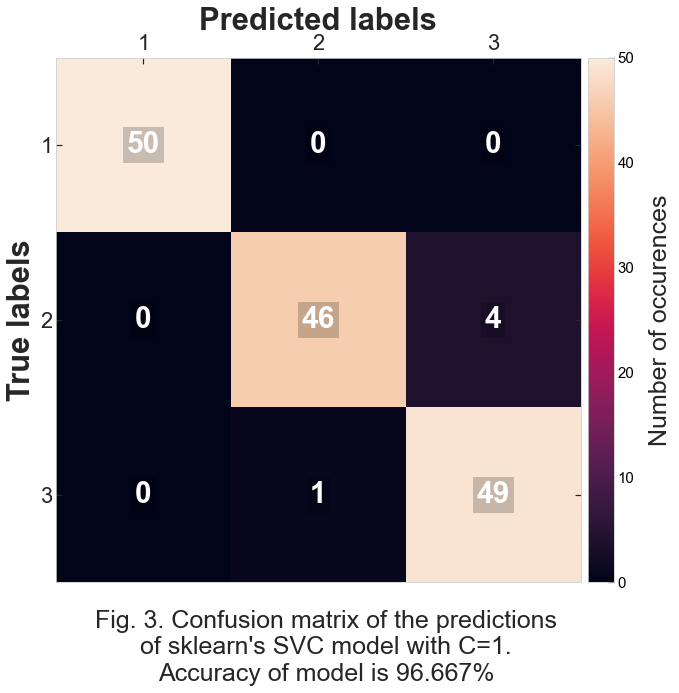

In [211]:
plot_confusion_matrix(conf_mat, y,
                      title=('Fig. 3. Confusion matrix of the predictions\nof sklearn\'s SVC model with C=1.\n' +
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

#### SVC with `C`=1000

In [212]:
# Define and fit the SVC model with C=1000 and linear kernel
svc = SVC(C=1000, kernel='linear')
svc.fit(X, y);
# Make predictions
y_pred = svc.predict(X)
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y, y_pred=y_pred)
conf_mat = confusion_matrix(y, y_pred)

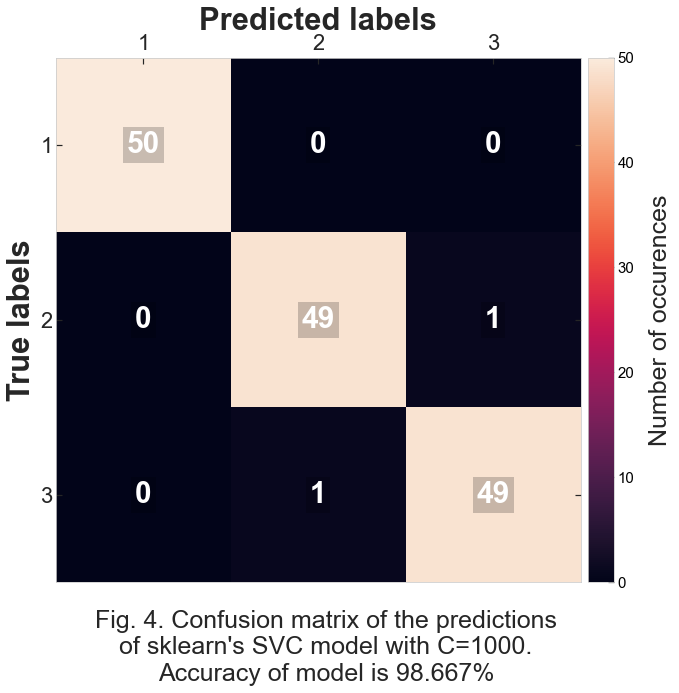

In [213]:
plot_confusion_matrix(conf_mat, y,
                      title=('Fig. 4. Confusion matrix of the predictions\nof sklearn\'s SVC model with C=1000.\n' +
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

### 1./c. Plotting decision boundary

#### Source used
- https://stackoverflow.com/questions/51297423/plot-scikit-learn-sklearn-svm-decision-boundary-surface

In [298]:
def make_meshgrid(X, h=0.02):
    
    x_min, x_max = X.min() - 1, X.max() + 1
    xx = np.meshgrid(np.arange(x_min[0], x_max[0], 0.02),
                     np.arange(x_min[1], x_max[1], 0.02),
                     np.arange(x_min[2], x_max[2], 0.02),
                     np.arange(x_min[3], x_max[3], 0.02),
                    copy=True)
    return xx

def plot_contours(ax, fit, xx, yy, **params):
    Z = fit.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [299]:
# Create 4D meshgrid
xx = make_meshgrid(X, h=0.02)

MemoryError: Unable to allocate 62.0 GiB for an array with shape (377, 319, 268, 258) and data type float64

In [273]:
X_min, X_max = X.min() - 1, X.max() + 1

ValueError: Expected 2D array, got 1D array instead:
array=[-0.90068117 -1.14301691 -1.38535265 -1.50652052 -1.02184904 -0.53717756
 -1.50652052 -1.02184904 -1.74885626 -1.14301691 -0.53717756 -1.26418478
 -1.26418478 -1.87002413 -0.05250608 -0.17367395 -0.53717756 -0.90068117
 -0.17367395 -0.90068117 -0.53717756 -0.90068117 -1.50652052 -0.90068117
 -1.26418478 -1.02184904 -1.02184904 -0.7795133  -0.7795133  -1.38535265
 -1.26418478 -0.53717756 -0.7795133  -0.41600969 -1.14301691 -1.02184904
 -0.41600969 -1.14301691 -1.74885626 -0.90068117 -1.02184904 -1.62768839
 -1.74885626 -1.02184904 -0.90068117 -1.26418478 -0.90068117 -1.50652052
 -0.65834543 -1.02184904  1.40150837  0.67450115  1.2803405  -0.41600969
  0.79566902 -0.17367395  0.55333328 -1.14301691  0.91683689 -0.7795133
 -1.02184904  0.06866179  0.18982966  0.31099753 -0.29484182  1.03800476
 -0.29484182 -0.05250608  0.4321654  -0.29484182  0.06866179  0.31099753
  0.55333328  0.31099753  0.67450115  0.91683689  1.15917263  1.03800476
  0.18982966 -0.17367395 -0.41600969 -0.41600969 -0.05250608  0.18982966
 -0.53717756  0.18982966  1.03800476  0.55333328 -0.29484182 -0.41600969
 -0.41600969  0.31099753 -0.05250608 -1.02184904 -0.29484182 -0.17367395
 -0.17367395  0.4321654  -0.90068117 -0.17367395  0.55333328 -0.05250608
  1.52267624  0.55333328  0.79566902  2.12851559 -1.14301691  1.76501198
  1.03800476  1.64384411  0.79566902  0.67450115  1.15917263 -0.17367395
 -0.05250608  0.67450115  0.79566902  2.24968346  2.24968346  0.18982966
  1.2803405  -0.29484182  2.24968346  0.55333328  1.03800476  1.64384411
  0.4321654   0.31099753  0.67450115  1.64384411  1.88617985  2.4920192
  0.67450115  0.55333328  0.31099753  2.24968346  0.55333328  0.67450115
  0.18982966  1.2803405   1.03800476  1.2803405  -0.05250608  1.15917263
  1.03800476  1.03800476  0.55333328  0.79566902  0.4321654   0.06866179].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

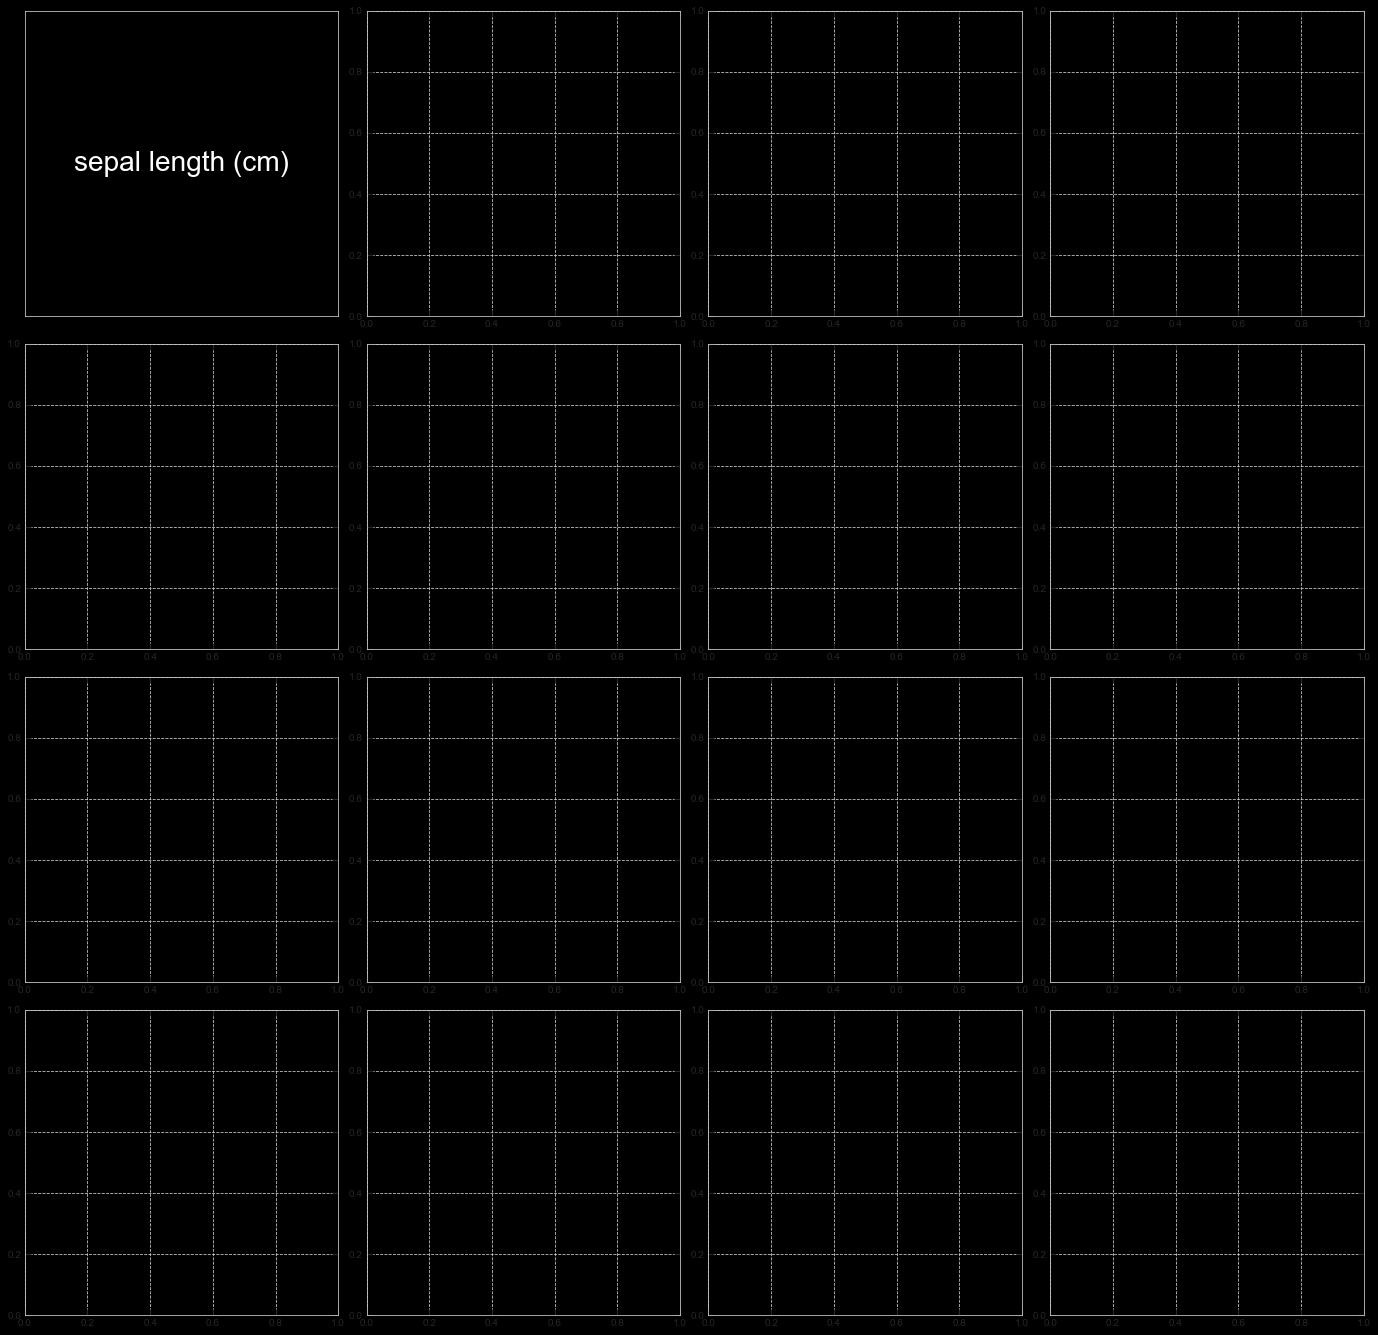

In [219]:
# Visualize iris dataset
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*6, nrows*6),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})
fig.subplots_adjust(hspace=0.09, wspace=0.09)

sc = 5
target_colors = np.array([cm.magma(0.5), cm.magma(0.75), cm.magma(0.93)])
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if i==j:
            ax.text(0.5, 0.5, features[i], color='white',
                    fontsize=28, ha='center', va='center')
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            # Set-up grid for plotting
            X_i, X_j = X[features[i]], X[features[j]]
            xx, yy = make_meshgrid(X_i, X_j)
            plot_contours(ax, svc, xx, yy, alpha=0.8, colors=target_colors)
            ax.scatter(X_i, X_j, s=sc**2,
                       color=target_colors[y])
            ax.tick_params(axis='both', which='major', labelsize=12, colors='white')

plt.suptitle('Fig. 2. Feature space of the Iris dataset', color='white',
             fontsize=axistitlesize+5, y=0.1)
plt.show()

In [224]:
xx, yy = make_meshgrid(X_i, X_j)

In [232]:
xx

array([[-2.87002413, -2.85002413, -2.83002413, ...,  3.44997587,
         3.46997587,  3.48997587],
       [-2.87002413, -2.85002413, -2.83002413, ...,  3.44997587,
         3.46997587,  3.48997587],
       [-2.87002413, -2.85002413, -2.83002413, ...,  3.44997587,
         3.46997587,  3.48997587],
       ...,
       [-2.87002413, -2.85002413, -2.83002413, ...,  3.44997587,
         3.46997587,  3.48997587],
       [-2.87002413, -2.85002413, -2.83002413, ...,  3.44997587,
         3.46997587,  3.48997587],
       [-2.87002413, -2.85002413, -2.83002413, ...,  3.44997587,
         3.46997587,  3.48997587]])

In [231]:
svc.fit(xx, y)

ValueError: Found input variables with inconsistent numbers of samples: [120263, 150]

## 2.) Linear SVC but non-linear separation

- create a dataset with the following: X, y = sklearn.datasets.make_moons(noise=0.1, random_state=0)
- perform the same steps just as in the previous exercise and use the linear kernel for  the SVC
- since linear SVC cannot do non-linear separation, you will need to do some workaround, for example adding polynomial features (3rd order would be a good choice)
- write down with your own words in few sentences how the support vector machine works 

## 3.) Load the dataset from 2 weeks ago and build/evaluate the SVC with default settings

Reminder:
- you need to build a classifier that predicts the probability of a sample coming from a cancerous (tumor type is normal or not) person based on the measured protein levels
- train the SVM classifier (SVC in sklearn API) on every second sample (not first 50% of the data (!), use every second line)
- generate prediction for the samples that were not used during the training

To-do now:
- build default SVC, but set it to predict probabilities
- plot the ROC curve and calculate the confusion matrix for the predictions
- do the same for the CancerSEEK predictions and compare your model's performance to CancerSEEK performance (as a reference, plot it on the same figure)
- how good is the performance of the new model?

## 4.) Scale data and try different kernels

- scale your data before applying the SVC model
- plot the ROC curve and calculate the confusion matrix for the predictions
- do your model perform better or worse after scaling? 
- try out other kernels (linear, poly) and evaluate the performance of the model the same way

## 5.) Split the data randomly to 3 parts: 70% train, 15% validation, 15% test data and tune hyperparameters

- prepare data as described in the title, then scale all input based on the training set
- select your best performing SVC model from the previous exercise
- check the behaviour of the SVC by modifying at least 3 of its hyperparameters (C, gamma, ...) and plot the AUC value vs the modified parameter (logscale may be better for visualization)
- create plots (at least 2) that shows the train, val and test accuracy based on a given hyperparameter's different values. Is it a good idea to rely on validation data when tuning hyperparameter in this case?
- select the best settings, train the SVC and evaluate with reference to CancerSEEK results with the ROC curve and the confusion matrix (match your results with CancerSEEK's results on the same dataset splitting)

### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 